In [180]:
pip install pandas

In [181]:
pip install scikit-plot

In [205]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

import matplotlib.pyplot as plt
import scikitplot as skplt

from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import TSNE
from sklearn.metrics import pairwise_distances 
from sklearn.decomposition import PCA
from matplotlib import cm

In [183]:
from google.colab import files
uploaded = files.upload()

Saving melb_data.csv to melb_data (4).csv


In [185]:
import io
df = pd.read_csv(io.BytesIO(uploaded['melb_data.csv']))

In [186]:
df.head(5)

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [187]:
df.shape

(18396, 22)

# **Step 1: Cleaning data**

In [188]:
#data types of each feature 
df.dtypes

Unnamed: 0         int64
Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [189]:
# checking for null values
df.isnull().sum()

Unnamed: 0           0
Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          3469
Bathroom          3471
Car               3576
Landsize          4793
BuildingArea     10634
YearBuilt         9438
CouncilArea       6163
Lattitude         3332
Longtitude        3332
Regionname           1
Propertycount        1
dtype: int64

In [190]:
# converting the date column to 'datetime'
# the dataset consists of housing sales between 2016-2017
df['Date'] = pd.to_datetime(df['Date'])

In [191]:
#creating columns for the date and month the apartment was sold 
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

import calendar
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

In [192]:
#real estate count per year and month
df.groupby(['Year', 'Month'])['Year'].count()

Year  Month
2016  Apr       720
      Aug      1037
      Dec       440
      Jan         2
      Jul      1101
      Jun       811
      Mar       630
      May       858
      Nov       792
      Oct      1061
      Sep       602
2017  Apr       871
      Aug      1666
      Dec       449
      Feb       415
      Jan       383
      Jul      1071
      Jun      1128
      Mar      1352
      May      1263
      Nov       159
      Sep      1585
Name: Year, dtype: int64

In [193]:
#dropping columns of no significance
df.drop(columns=['YearBuilt', 'Postcode', 'Address'], inplace=True)

In [194]:
#filling null values for council area with 'unavailable'
df['CouncilArea'] = df.CouncilArea.fillna('Unavailable')

In [195]:
#dropping observations with null values for car
df.dropna(subset=['Car'], inplace=True)

In [196]:
df.groupby(['BuildingArea', 'Suburb'])['Suburb'].count()

BuildingArea  Suburb        
0.0           Balwyn North      2
              Brighton East     1
              Brunswick West    1
              Bundoora          2
              Craigieburn       1
                               ..
1561.0        Elsternwick       1
3112.0        Camberwell        1
3558.0        Fitzroy North     1
6791.0        Bulleen           1
44515.0       New Gisborne      1
Name: Suburb, Length: 6461, dtype: int64

In [197]:
df.drop(columns = "Unnamed: 0", inplace = True)

In [198]:
df.index.name = 'Identifier'

In [199]:
df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year,Month
Identifier,,,,,,,,,,,,,,,,,,,,
0,Abbotsford,2,h,1480000.0,S,Biggin,2016-03-12,2.5,2.0,1.0,1.0,202.0,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,2016,Mar
1,Abbotsford,2,h,1035000.0,S,Biggin,2016-04-02,2.5,2.0,1.0,0.0,156.0,79.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,2016,Apr
2,Abbotsford,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3.0,2.0,0.0,134.0,150.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,2017,Apr
3,Abbotsford,3,h,850000.0,PI,Biggin,2017-04-03,2.5,3.0,2.0,1.0,94.0,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,2017,Apr
4,Abbotsford,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3.0,1.0,2.0,120.0,142.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,2016,Apr


In [200]:
df.drop(['Suburb','SellerG','CouncilArea','Regionname','Month','Type','Method','Date'], axis = 1, inplace = True)

In [201]:
df.astype('float')

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount,Year
Identifier,,,,,,,,,,,,
0,2.0,1480000.0,2.5,2.0,1.0,1.0,202.0,NaN,-37.79960,144.99840,4019.0,2016.0
1,2.0,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,-37.80790,144.99340,4019.0,2016.0
2,3.0,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,-37.80930,144.99440,4019.0,2017.0
3,3.0,850000.0,2.5,3.0,2.0,1.0,94.0,NaN,-37.79690,144.99690,4019.0,2017.0
4,4.0,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0,-37.80720,144.99410,4019.0,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18391,2.0,622500.0,6.8,2.0,2.0,1.0,NaN,89.0,-37.86393,144.90484,6380.0,2017.0
18392,4.0,2500000.0,6.8,4.0,1.0,5.0,866.0,157.0,-37.85908,144.89299,6380.0,2017.0
18393,4.0,1100000.0,12.7,4.0,3.0,2.0,NaN,NaN,-37.72006,145.10547,1369.0,2017.0


In [202]:
df.dropna(how = 'any',inplace = True)

In [203]:
df.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount,Year
Identifier,,,,,,,,,,,,
1,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,-37.8079,144.9934,4019.0,2016
2,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,-37.8093,144.9944,4019.0,2017
4,4,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0,-37.8072,144.9941,4019.0,2016
6,3,1876000.0,2.5,4.0,2.0,0.0,245.0,210.0,-37.8024,144.9993,4019.0,2016
7,2,1636000.0,2.5,2.0,1.0,2.0,256.0,107.0,-37.8060,144.9954,4019.0,2016


# **Step 2: Correlation, Scaling, PCA**

In [ ]:
corrmap = df.corr()
sns.heatmap(corrmap)
plt.show()

In [207]:
df_standard = StandardScaler().fit_transform(df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



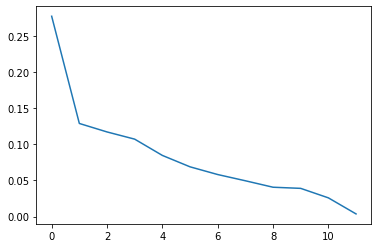

In [ ]:
pca = PCA().fit(df_standard)
pcs = pca.transform(df_standard)varexp = pca.explained_variance_ratio_
sns.lineplot(range(0, len(varexp)+0), varexp)

plt.show()show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



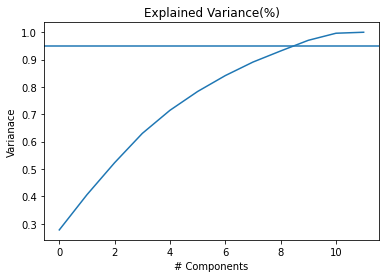

In [ ]:
varexp = np.cumsum(pca.explained_variance_ratio_)
sns.lineplot(range(0, len(varexp)+0), varexp)

plt.axhline(.95)
plt.xlabel('# Components')
plt.ylabel('Varianace')
plt.title('Explained Variance(%)')

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



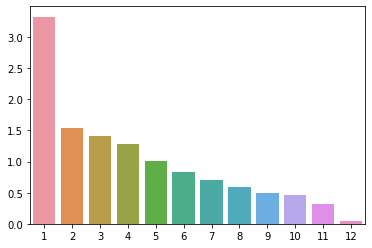

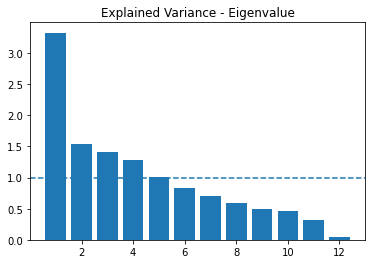

In [ ]:
def ev_plot(ev):
  y = list(ev)
  x = list(range(1,len(ev)+1))
  return x, y

ev = pca.explained_variance_

x, y = ev_plot(pca.explained_variance_)

sns.barplot(x, y)
plt.show()

plt.title("Explained Variance - Eigenvalue")
plt.bar(x=x, height=y)
plt.axhline(y=1, ls="--")
plt.show()

In [ ]:
tsne = TSNE()
tsne.fit(pcs)

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=None, verbose=0)

In [ ]:
te = tsne.embedding_

In [ ]:
comps = pca.components_
type(comps)
comps.shape

(12, 12)

In [ ]:
COLS = ["PC" + str(i) for i in range(1, len(comps)+1)]
loadings = pd.DataFrame(comps.T, columns=COLS, index=df.columns)
loadings.head(3)3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
Rooms,0.497856,-0.030114,-0.130314,-0.141166,0.003265,-0.019538,-0.229770,0.072361,-0.125231,-0.281976,-0.240473,-0.709140
Price,0.351362,-0.283704,-0.190307,0.338834,0.060753,0.286476,0.153917,-0.102385,0.015862,-0.247687,0.680410,0.023269
Distance,0.198030,0.216031,0.521726,-0.349002,-0.088524,-0.345764,-0.229053,0.184725,-0.017521,0.031148,0.552065,0.009140


In [ ]:
comps = pcs[:, :2]
df2 = pd.DataFrame(comps, columns=['component 1', 'component 2'], index=df.index)
df2.head(3)

,component 1,component 2
Identifier,,
1,-2.243661,-0.711222
2,-0.228821,-0.629096
4,0.277341,-0.803609


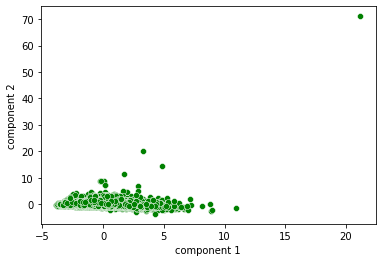

In [ ]:
sns.scatterplot(x="component 1",y="component 2",data=df2, color = 'Green')
plt.show()

# **Step 3: Choose K using Sihouette score**

In [ ]:
output = {}
num_of_clusters = 10

for k in range(2, num_of_clusters):
  
  output[k] = {}
  kmeans = KMeans(n_clusters = k, n_init = 100).fit(df2)
  sil_score = metrics.silhouette_score(df2, kmeans.labels_, metric = 'euclidean')

  output[k]['silhouette_score'] = sil_score

  print("Number of clusters: {}".format(k))
  print("Silhouette Score: {}".format(sil_score))

Number of clusters: 2
Silhouette Score: 0.45295895081976306
Number of clusters: 3
Silhouette Score: 0.4535497302809155
Number of clusters: 4
Silhouette Score: 0.41711773913985245
Number of clusters: 5
Silhouette Score: 0.4168692768404286
Number of clusters: 6
Silhouette Score: 0.3864825156473832
Number of clusters: 7
Silhouette Score: 0.3779952065461126
Number of clusters: 8
Silhouette Score: 0.38116650321098383
Number of clusters: 9
Silhouette Score: 0.35780580219608055


Based on Sihouette score I choose choose 2 or 3 clusters.

# **Step 4: Choose 2 clusters using Silhouette Plot and build Model using KMeans**

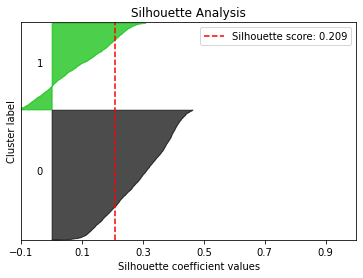

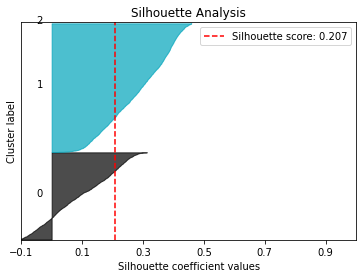

In [ ]:
KRANGE = [2, 3]

for k in KRANGE:

  kmeans = KMeans(n_clusters = k, n_init = 100)
  kmeans_labs = kmeans.fit_predict(df_standard)
  skplt.metrics.plot_silhouette(df_standard, kmeans_labs)

Sihouette Analysis helps me identify the optimal number of clusters is 2.

In [ ]:
KRANGE = range(2, 30)

ss = []

for k in KRANGE:
  km = KMeans(k)
  lab = km.fit_predict(df2)
  ss.append(km.inertia_)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



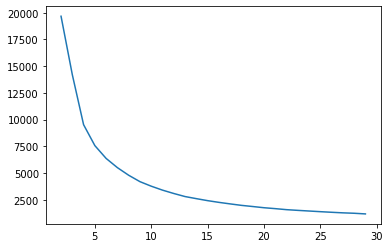

In [ ]:
sns.lineplot(KRANGE, ss)

In [ ]:
KRANGE = range(2, 30)

ss = []

for k in KRANGE:
  km = KMeans(k)
  lab = km.fit_predict(df2)
  ss.append(metrics.silhouette_score(df2, lab))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



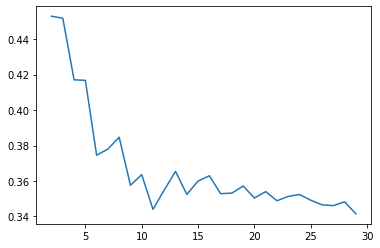

In [ ]:
sns.lineplot(KRANGE, ss)

In [ ]:
kmeans.n_iter_

7

In [ ]:
centers = kmeans.cluster_centers_
centers.shape

(3, 12)

In [ ]:
df2['km'] = kmeans_labs

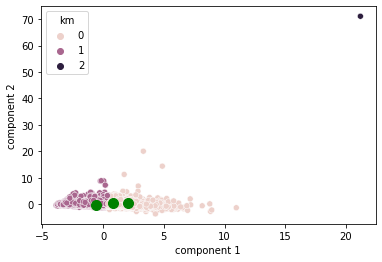

In [ ]:
kmeans_centers = kmeans.cluster_centers_
sns.scatterplot(data=df2, x="component 1", y="component 2", hue="km")
plt.scatter(kmeans_centers[:,0], kmeans_centers[:,1], c="g", s=100)

In [ ]:
df2.head()

,component 1,component 2,km
Identifier,,,
1,-2.243661,-0.711222,1
2,-0.228821,-0.629096,1
4,0.277341,-0.803609,1
6,0.352417,-1.105198,1
7,-1.232328,-0.694107,1


# **Step 5: Plot Cluster Chart**

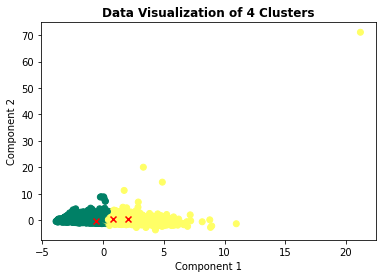

In [ ]:
KRANGE1 = [2]

for k in KRANGE1:

  kmeans = KMeans(n_clusters=k, n_init = 100).fit(df2)

  C1 = centers[:,0]
  C2 = centers[:,1]

  plt.figure()

  x = df2['component 1']
  y = df2['component 2']

  plt.xlabel("Component 1")
  plt.ylabel("Component 2")

  plt.scatter(x,y, c=kmeans.labels_.astype(float),cmap='summer',marker='o')
  plt.scatter(C1,C2, marker = 'x', color = 'r')

  plt.title("Data Visualization of 4 Clusters".format(k),fontweight='bold')
  plt.show()

# **Step 6: Hclust algorithm**

In [209]:
diste = pdist(df2.values)
distc = pdist(df2.values, metric="cosine")

In [210]:
hclust_e = linkage(diste)
hclust_c = linkage(distc)

In [ ]:
LINKS = [hclust_e, hclust_c]
TITLE = ['Euclidean', 'Cosine']

plt.figure(figsize=(15, 5))

for i, m in enumerate(LINKS):
  plt.subplot(1, 2, i+1)
  plt.title(TITLE[i])
  dendrogram(m,
             leaf_rotation=90,
             orientation="left")
  
plt.show()

In [ ]:
METHODS = ['single', 'complete', 'average', 'ward']
plt.figure(figsize=(15,5))

for i, m in enumerate(METHODS):
  plt.subplot(1, 4, i+1)
  plt.title(m)
  dendrogram(linkage(df.values, method=m),
             labels = df.index,
             leaf_rotation=90,
             leaf_font_size=10)

In [ ]:
df2_hclust = linkage(pca_dataset.values, method="ward")
dendrogram(df2_hclust,
          labels = df2.index,
          leaf_rotation=90,
          leaf_font_size=10)

plt.show()

# **Step 7: DBSCAN**

In [ ]:
nb = NearestNeighbors(2)
nbrs = nb.fit(df2)

distances, indices = nbrs.kneighbors(df2)

distances = np.sort(distances, axis=0)

distances = distances[:,1]


sns.lineplot(range(len(distances)), distances)

In [ ]:
db = DBSCAN(eps=.6, min_samples=4)
dbc = db.fit_predict(df2)
dbc

In [ ]:
np.unique(dbc)

In [ ]:
pca_dataset['labels'] = dbc

pal = sns.color_palette("husl", len(np.unique(dbc)))
plt.figure(figsize=(10,6))
sns.scatterplot(data=pca_dataset, x="component 1", y="component 2", hue="labels", palette=pal)

# **Step 8: Summary**

In [ ]:
df2_labels = fcluster(df2_hclust,t = 2, criterion = 'maxclust')
df2['kms'] = kmeans_labs
df2['hc_clust'] = df2_labels

In [ ]:
df2.head()

In [ ]:
df2.hc_clust.value_counts(sort = True)

In [ ]:
df2.kms.value_counts(sort = True)

In [ ]:
df2_profile = df2.groupby("hc_clust").mean()

df2_profile.T

In [ ]:
df2_profile = df2.groupby("kms").mean()

df2_profile.T

In [ ]:
df2.loc[df2.hc_clust == 1,: ]

In [ ]:
df2.loc[df2.hc_clust == 2,: ]